# College Basketball Analysis

In [3]:
# Import libraries 

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as mse 
from scipy.stats import linregress

# Project Overview

This project explores NCAA college basketball team statistics. The goal is to explore the dataset using different functions within pandas, answer questions about the data using data analysis, and interpret graphs. These skills are fundamental for any data analyst.

Libraries used during this analysis:

-Scipy

-Matplotlib

-Numpy

-Seaborn

The dataset is based on college basketball teams that provides us with different metrics to analyze teams performance

Each row is representative of a team and their overall achievements and stats over the course of two seasons. 

In [4]:
# Load the dataset

basketballData = pd.read_excel('../Data/CollegeBasketball.xlsx')
basketballData.head()

,TEAM,CONF,G,W,ADJOE,ADJDE,BARTHAG,EFG%,EFGD%,TOR,...,FTR,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,POSTSEASON,SEED
0,Houston,B12,34,30,119.2,85.5,0.9785,49.7,44.0,13.7,...,29.9,39.0,48.4,43.4,34.7,30.0,63.3,10.6,S16,1.0
1,Connecticut,BE,34,31,127.1,93.6,0.9712,57.1,45.1,14.9,...,33.3,32.5,58.5,43.7,36.7,31.9,64.6,11.3,Champions,1.0
2,Purdue,B10,33,29,126.2,94.7,0.9644,56.0,47.7,16.5,...,42.8,23.0,53.2,48.1,40.8,31.4,67.6,11.0,2ND,1.0
3,North Carolina,ACC,34,27,116.8,93.2,0.9305,51.3,46.4,14.4,...,36.8,28.3,50.3,46.0,35.4,31.4,70.4,6.6,S16,1.0
4,Iowa St.,B12,34,27,113.6,86.5,0.9583,51.9,47.1,15.7,...,36.1,35.2,51.7,46.9,34.9,31.5,67.6,6.9,S16,2.0


# Data Exploration

#### What are the column names in the dataset?

In [5]:

basketballData.columns

Index(['TEAM', 'CONF', 'G', 'W', 'ADJOE', 'ADJDE', 'BARTHAG', 'EFG%', 'EFGD%',
       'TOR', 'TORD', 'ORB', 'DRB', 'FTR', 'FTRD', '2P_O', '2P_D', '3P_O',
       '3P_D', 'ADJ_T', 'WAB', 'POSTSEASON', 'SEED'],
      dtype='object')

#### How many rows and columns are in the dataset?

In [6]:

basketballData.shape

(725, 23)

#### What are the data types of each column?

In [7]:

basketballData.dtypes

TEAM           object
CONF           object
G               int64
W               int64
ADJOE         float64
ADJDE         float64
BARTHAG       float64
EFG%          float64
EFGD%         float64
TOR           float64
TORD          float64
ORB           float64
DRB           float64
FTR           float64
FTRD          float64
2P_O          float64
2P_D          float64
3P_O          float64
3P_D          float64
ADJ_T         float64
WAB           float64
POSTSEASON     object
SEED          float64
dtype: object

In [8]:
# Verify if there are any missing values in the dataset
basketballData.isnull().sum()

TEAM            0
CONF            0
G               0
W               0
ADJOE           0
ADJDE           0
BARTHAG         0
EFG%            0
EFGD%           0
TOR             0
TORD            0
ORB             0
DRB             0
FTR             0
FTRD            0
2P_O            0
2P_D            0
3P_O            0
3P_D            0
ADJ_T           0
WAB             0
POSTSEASON    589
SEED          589
dtype: int64

In [9]:
basketballData.describe()

,G,W,ADJOE,ADJDE,BARTHAG,EFG%,EFGD%,TOR,TORD,ORB,DRB,FTR,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,SEED
count,725.000000,725.000000,725.000000,725.000000,725.000000,725.000000,725.000000,725.000000,725.000000,725.000000,725.000000,725.000000,725.000000,725.000000,725.000000,725.000000,725.000000,725.000000,725.000000,136.000000
mean,31.227586,17.008276,104.652276,104.652414,0.493570,50.369517,50.517931,17.693517,17.639172,28.620276,28.795862,32.287310,32.455862,50.190207,50.294897,33.797655,33.930207,67.310897,-8.056097,8.779412
std,2.271444,6.009195,7.148313,6.108328,0.252749,2.880520,2.545971,2.081197,2.359022,4.031158,2.912378,4.672694,5.445335,3.289986,2.886335,2.418862,2.170797,2.470434,6.864529,4.675692
min,21.000000,1.000000,85.100000,85.500000,0.028300,41.000000,41.300000,12.000000,11.200000,17.000000,20.200000,20.900000,16.200000,40.400000,40.800000,24.700000,26.500000,58.700000,-24.800000,1.000000
25%,30.000000,13.000000,99.700000,100.300000,0.276200,48.600000,48.900000,16.300000,16.100000,25.900000,26.700000,29.100000,28.500000,48.100000,48.400000,32.200000,32.500000,65.700000,-13.000000,5.000000
50%,31.000000,17.000000,104.100000,104.900000,0.465500,50.600000,50.500000,17.700000,17.400000,28.600000,28.800000,32.000000,31.800000,50.200000,50.400000,33.800000,34.000000,67.200000,-8.800000,9.000000
75%,33.000000,21.000000,109.500000,109.400000,0.728800,52.100000,52.200000,18.900000,18.900000,31.500000,30.700000,35.200000,35.700000,52.200000,52.200000,35.600000,35.400000,68.900000,-3.100000,13.000000
max,39.000000,35.000000,127.100000,120.700000,0.978500,59.900000,58.200000,24.000000,26.000000,41.900000,38.600000,50.000000,51.400000,62.000000,59.000000,41.200000,41.000000,75.100000,11.300000,16.000000


Important columns to note:

G – Games Played

W – Wins

ADJOE – Adjusted Offensive Efficiency

ADJDE – Adjusted Defensive Efficiency

BARTHAG – Overall team strength estimate

# Answering Questions

In [10]:
# Which team won the season?
champion = basketballData[basketballData['POSTSEASON'] == 'Champions']
champion[['TEAM', 'CONF', 'W', 'BARTHAG', 'SEED']]

,TEAM,CONF,W,BARTHAG,SEED
1,Connecticut,BE,31,0.9712,1.0
374,Connecticut,BE,31,0.9643,4.0


Using this filter you can look at the champion of the season and a summary of who they were and how strong they are 

In [12]:
# Which team had the best offensive rating?
# ADJOE (Adjusted Offensive Efficiency)
bestOffense = basketballData.sort_values(by='ADJOE', ascending=False).head(5)
bestOffense[['TEAM', 'CONF', 'ADJOE', 'W', 'POSTSEASON']]



,TEAM,CONF,ADJOE,W,POSTSEASON
1,Connecticut,BE,127.1,31,Champions
2,Purdue,B10,126.2,29,2ND
9,Illinois,B10,125.3,26,E8
14,Alabama,SEC,125.2,21,F4
371,Gonzaga,WCC,123.2,31,E8


**Net Rating**

What is a net rating?

$$
\text{Net Rating} = \text{AdjOE} - \text{AdjDE}
$$

**Offensive Rating**

Measures how many points a team scores per 100 possessions.

**Defensive Rating**

Measures how many points a team allows per 100 possessions.

**Net Rating**

A positive net rating indicates team is scoring more than they give up to opponents. Negative indicates they are giving up more points than they are earning.

Sports analytics are important and are a great example of being able to make predictions about teams. I wanted to see if the net rating and whether the team wins or loses are positively correlated. In order to do that, I ran a linear regression model to the dataset to answer this question.

**R-Value**

An R-Value (also known as a correlation coefficient) is a method of quantifying the strength of linear relationships between two variables.

-Values closer to -1 or 1 indicate a stronger relationship 

-Values nearing 0 have a weak or nonexistent relationship

**P-Value**

A p-value helps determine whether the relationship between two variables is statistically significant. In simple terms, it tells you if the result is likely due to something real, or if it could have just happened by chance.

-Lower p-value means less likely due to chance

-Bigger p-value means more likely due to chance 

Text(-30, 27, 'P = 3.1201263621363635e-154')

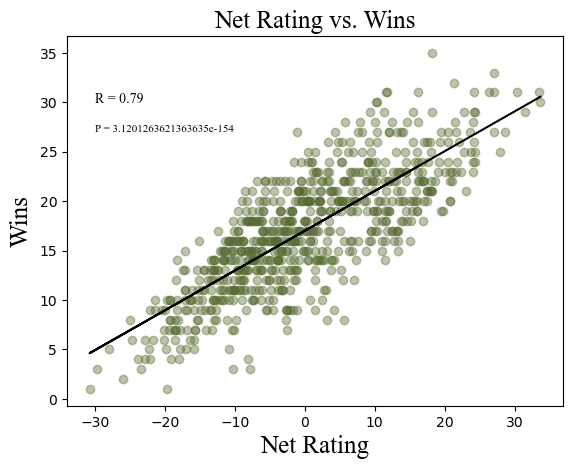

In [13]:
basketballData['Net Rating'] = basketballData['ADJOE'] - basketballData['ADJDE']
#Setting X equal to the net rating column and y equal to wins column to see if there is a linear relationship between the two
X = basketballData['Net Rating'] 
y = basketballData['W']

model = linregress(X, y) #Running a linear regression model based off net rating and wins 

fig, ax = plt.subplots()
ax.scatter(X, y, color = 'darkolivegreen', alpha = 0.4)

yhat = model.slope * basketballData['Net Rating'] + model.intercept #Calculating predicted outputs based off regression line

r = model.rvalue
p = model.pvalue

#print(model)
ax.plot(X, yhat, color = 'black')
ax.set_title('Net Rating vs. Wins', fontname = 'Times New Roman', fontsize = 18)
ax.set_xlabel('Net Rating', fontname = 'Times New Roman', fontsize = 18)
ax.set_ylabel('Wins', fontname = 'Times New Roman', fontsize = 18)
ax.text(-30, 30, f'R = {round(r, 2)}', fontname = 'Times New Roman')
ax.text(-30, 27, f'P = {p}', fontsize = 8, fontname = 'Times New Roman')

# Pair Plot 
The pair plot is a great tool for visually exploring relationships between multiple numeric variables in your dataset.
Each scatterplot in the grid shows how two variables relate to each other. The diagonal shows histograms (distributions) for each variable.

#### Variables used: 

* **ADJOE**: Adjusted Offensive Efficiency

* **ADJDE**: Adjusted Defensive Efficiency

* **ADJ_T**: Adjusted Tempo (pace of play)

* **BARTHAG**: Overall team strength

* **W**: Total wins

The pair plot visualizes:

* The relationship between each pair of variables 
* The distribution of each variable individually

Pearson Correlation Matrix:
             ADJ_T     ADJOE     ADJDE   BARTHAG         W
ADJ_T    1.000000  0.072959  0.116807 -0.017028  0.016388
ADJOE    0.072959  1.000000 -0.571855  0.890620  0.716382
ADJDE    0.116807 -0.571855  1.000000 -0.862199 -0.678380
BARTHAG -0.017028  0.890620 -0.862199  1.000000  0.774625
W        0.016388  0.716382 -0.678380  0.774625  1.000000


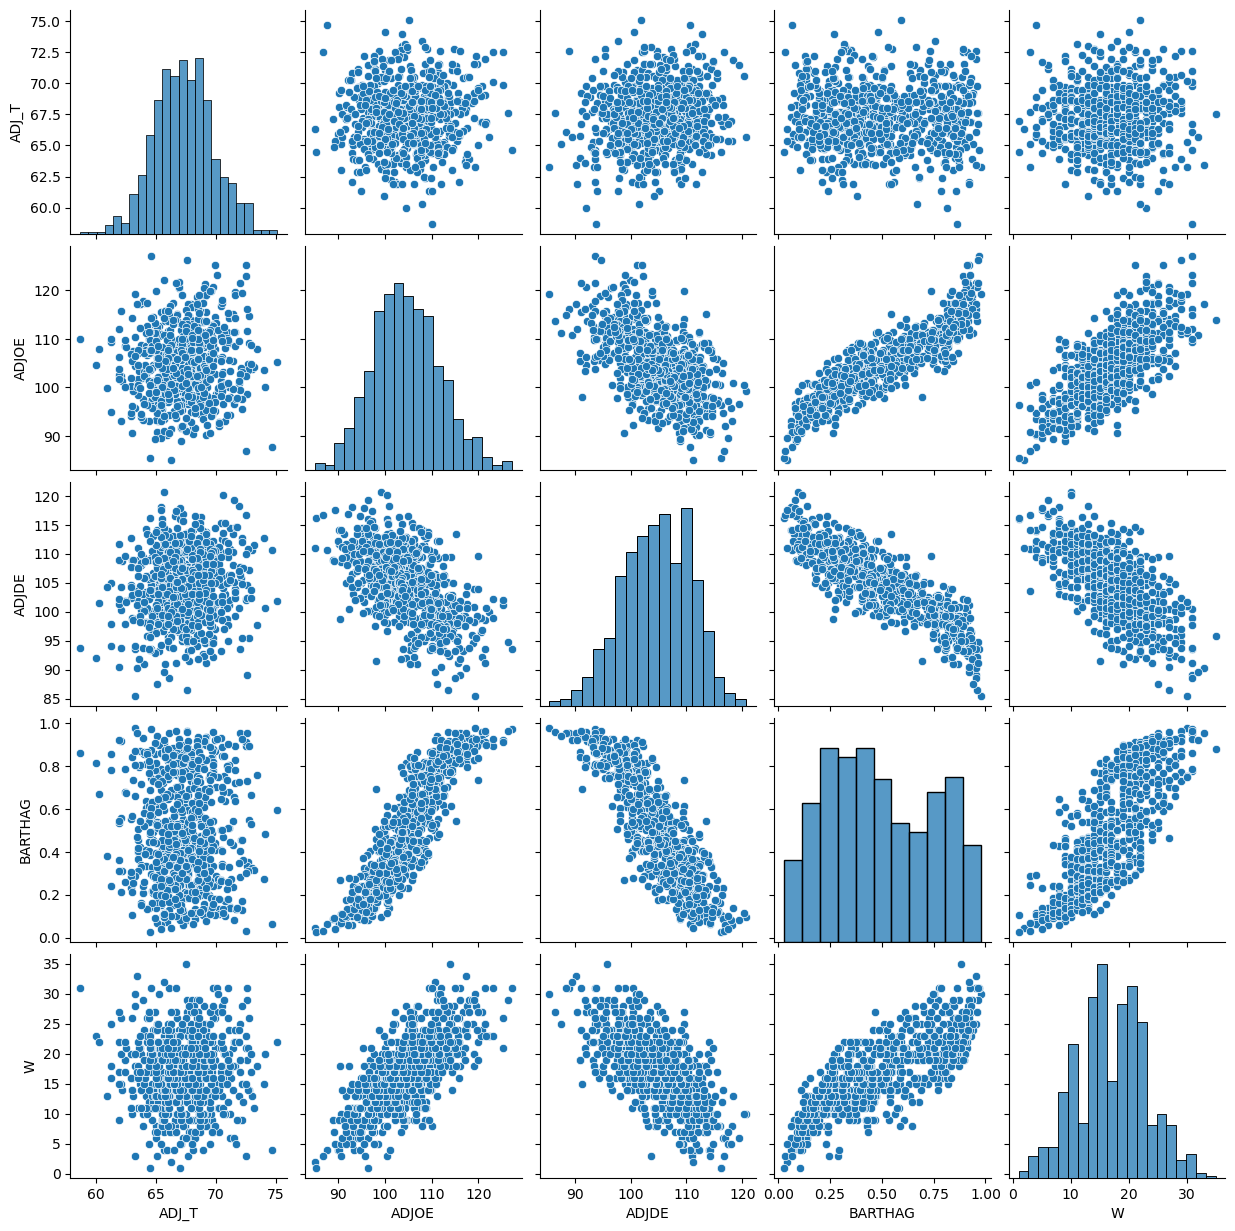

In [14]:
# Visualize relationships between Wins and other key performance metrics: ADJOE, ADJDE, ADJ_T, and BARTHAG

# Define variable
top_vars = ['ADJ_T', 'ADJOE', 'ADJDE', 'BARTHAG', 'W']

# Compute Pearson correlation matrix to quantify linear relationships
pearsonr = basketballData[top_vars].corr(method='pearson')
print(f'Pearson Correlation Matrix:\n {pearsonr}')

# Create a pairplot to visualize relationships
# Diagonals show histograms of each variable
# Scatterplots show patterns between variable pairs
sns.pairplot(basketballData[top_vars])
plt.show()

### Interpretation:
The pair plot shows strong relationships between team strength (BARTHAG) and both offensive (ADJOE) and defensive efficiency (ADJDE). Wins (W) also follow this pattern, stronger, more efficient teams win more games. Interestingly, tempo (ADJ_T) has little impact on team strength or success, suggesting that how efficiently a team plays matters more than how fast it plays.